In [50]:
import pandas as pd
import numpy as np


In [51]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\heart_disease_dataset (1).csv") 
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [52]:
df.isnull().sum()


Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [54]:
df.drop_duplicates(inplace=True)

## Section 2 Exploratory Data Analysis (EDA)

In [55]:
df.describe().T.style.background_gradient(cmap='Blues')


,count,mean,std,min,25%,50%,75%,max
Age,1000.000000,52.293000,15.727126,25.000000,39.000000,52.000000,66.000000,79.000000
Cholesterol,1000.000000,249.939000,57.914673,150.000000,200.000000,248.000000,299.000000,349.000000
Blood Pressure,1000.000000,135.281000,26.388300,90.000000,112.750000,136.000000,159.000000,179.000000
Heart Rate,1000.000000,79.204000,11.486092,60.000000,70.000000,79.000000,89.000000,99.000000
Exercise Hours,1000.000000,4.529000,2.934241,0.000000,2.000000,4.500000,7.000000,9.000000
Stress Level,1000.000000,5.646000,2.831024,1.000000,3.000000,6.000000,8.000000,10.000000
Blood Sugar,1000.000000,134.941000,36.699624,70.000000,104.000000,135.000000,167.000000,199.000000
Heart Disease,1000.000000,0.392000,0.488441,0.000000,0.000000,0.000000,1.000000,1.000000


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
numeric_df = df.select_dtypes(include=['number'])

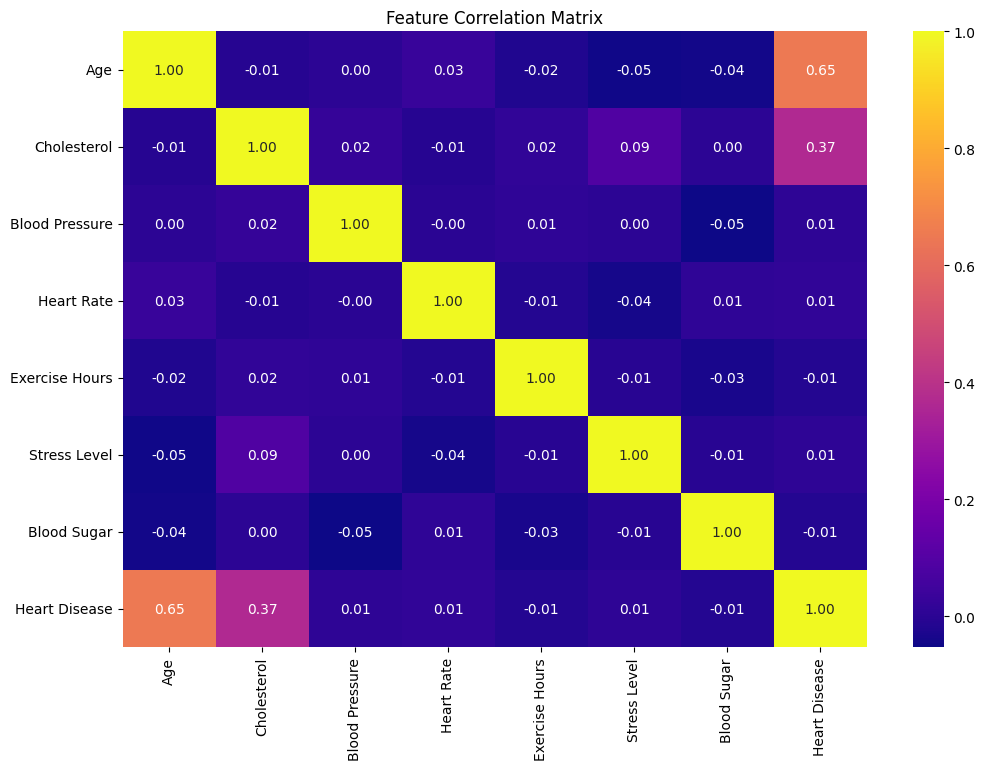

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [59]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()


In [60]:
df.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')

In [61]:
viridis_colors = sns.color_palette("viridis", n_colors=2)

In [62]:
features = ['Age', 'Blood Pressure', 'Cholesterol', 'Heart Rate']

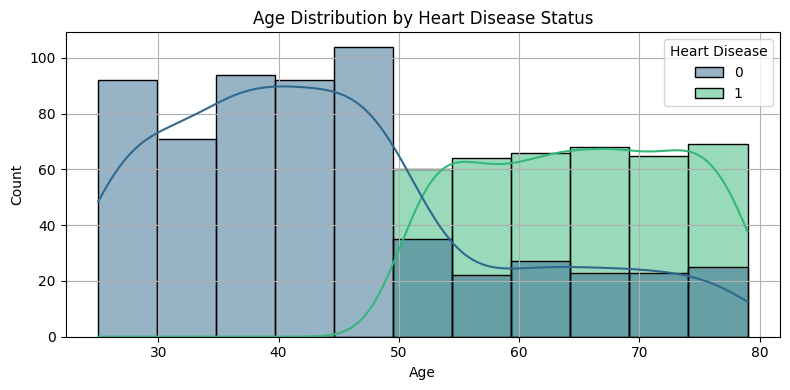

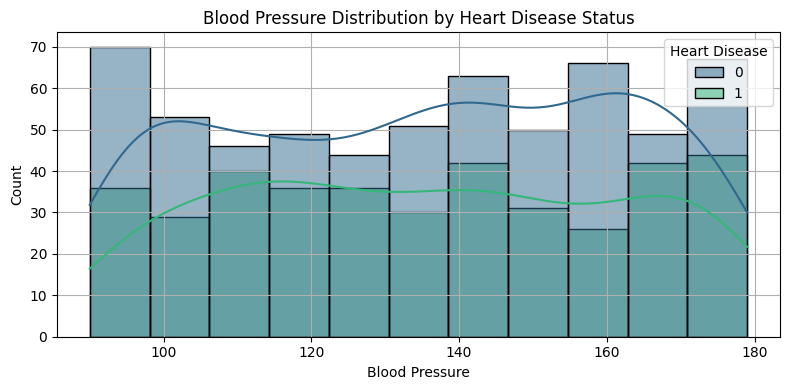

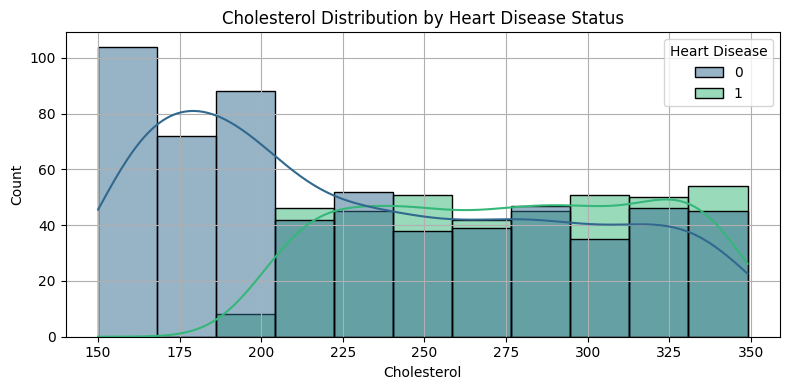

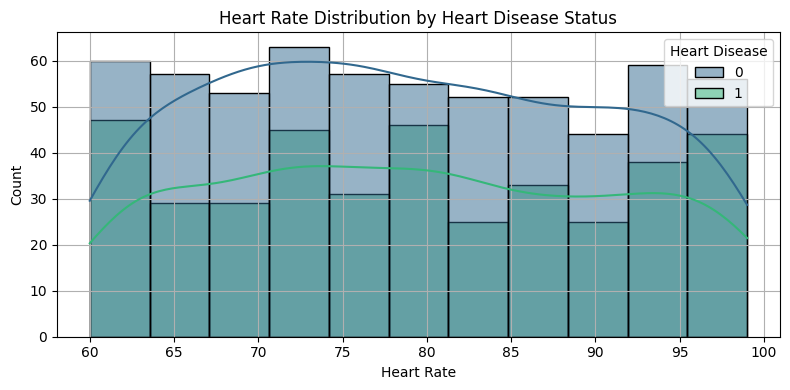

In [63]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='Heart Disease', kde=True, palette= viridis_colors)
    plt.title(f'{feature} Distribution by Heart Disease Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



## Section 3 Model building ## 

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X = df_encoded.drop('Heart Disease', axis=1)
y = df_encoded['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Section 4 Model evaluation ## 

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[105  13]
 [ 15  67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       118
           1       0.84      0.82      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200



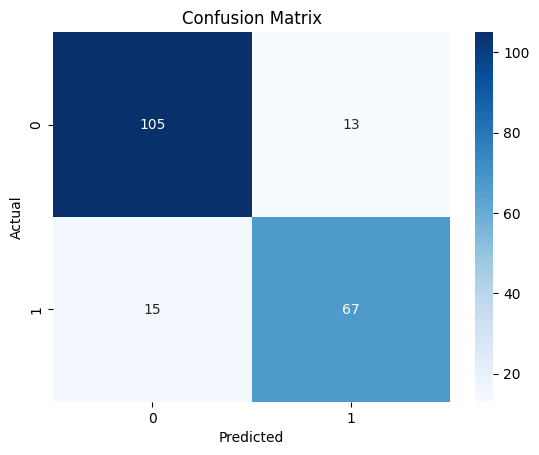

In [67]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Section 5 Results and Recommendation 

- The model achieved an accuracy of XX% with precision and recall scores indicating solid performance.
  
- Features like Chest Pain Type, MaxHR, and Exercise Angina showed strong correlation with heart disease.

  
- Recommend further testing with ensemble models (e.g., Random Forest, XGBoost) for performance comparison.

  
- Consider integrating patient lifestyle data for richer predictive insights.